We are going to make a social network of all the NFL teams and their schedules (i.e. network every team with every other team they are scheduled to play in the 2017 season). First we will need to collect data of every team in the NFL and every team they play on their schedule respectively. This idea spawned from the lecture video and how the prof mapped all the college football games and clustered them together .

In [4]:
#import libraries
import pandas as pd
import numpy as np
import re
import pickle
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
#initialize empty dataframe to write to

df_concat = pd.DataFrame()

#list website of the two teams with 5 preseason games as opposed to 4
#that the rest of the NFL has because of the hall of fame game
hof_teams = ('http://www.espn.com/nfl/team/schedule/_/name/dal/dallas-cowboys',
            'http://www.espn.com/nfl/team/schedule/_/name/ari')

In [7]:
for site in hof_teams:
    #split the url by '/' and set team name to the list item in the list e.g. '...schedule/_/name/ari' = ari
    team = site.split('/')
    team = team[-1]
    
    #load the website tables into pandas DataFrame
    raw = pd.read_html(site)
    #set the actual dataframe to the first dataframe in the list of dataframes provided by the site
    df = raw[0]
    
    #create a seperate Dataframe of the current teams name listed 17x to merge later for the 'from' column - 17 for 17 weeks in a season
    df_from = pd.DataFrame({'from':[team]*17})
    
    #slice only the columns and rows needed from the Dataframe from the website and reset indices
    #This is why we have a seperate step for these 2 sites vs all the other teams
    #need to slice the dataframe imported from the website at a different point
    #df.ix[9:,2:2] as opposed to df.ix[8:,2:2] for the rest of teh sites due to the extra preseason game
    df_to = df.ix[9:,2:2].rename(columns={2:'to'}).reset_index().drop('index', axis =1)
    
    #merge the two dataframes
    df_concat2 = pd.merge(df_from, df_to, how='inner', left_index=True, right_index=True).replace({'Nan':np.NaN}).dropna().reset_index().drop('index', axis =1)

    #drop the 'vs' and '@' in the team names and replace the fixed names in the dataframe
    for pos, opponent in enumerate(df_concat2.to):
        edit = re.search('[A-Z]*[^A-Z]*',opponent)
        opponent = opponent[len(edit.group()):]
        df_concat2.loc[pos,'to'] = opponent
    
    #Set the index to the team name and concatenate with composite DataFrame    
    df_concat2.set_index('from', inplace=True)
    
    #concatenate
    frames = [df_concat, df_concat2]
    df_concat = pd.concat(frames, ignore_index=False)
#pd.set_option('display.max_rows', 600)   
df_concat

C:\Users\SCOTT\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,to
from,
dallas-cowboys,New York
dallas-cowboys,Denver
dallas-cowboys,Arizona
dallas-cowboys,Los Angeles
dallas-cowboys,Green Bay
dallas-cowboys,San Francisco
dallas-cowboys,Washington
dallas-cowboys,Kansas City
dallas-cowboys,Atlanta


In [8]:
#create a list of all the other websites containing the teams
#schedule we are going to mine the data from
websites = ['http://www.espn.com/nfl/team/schedule/_/name/buf',
           'http://www.espn.com/nfl/team/schedule/_/name/den',
           'http://www.espn.com/nfl/team/schedule/_/name/nyg',
           'http://www.espn.com/nfl/team/schedule/_/name/mia',
           'http://www.espn.com/nfl/team/schedule/_/name/phi',
           'http://www.espn.com/nfl/team/schedule/_/name/ne',
           'http://www.espn.com/nfl/team/schedule/_/name/wsh',
           'http://www.espn.com/nfl/team/schedule/_/name/nyj',
           'http://www.espn.com/nfl/team/schedule/_/name/chi',
           'http://www.espn.com/nfl/team/schedule/_/name/bal',
           'http://www.espn.com/nfl/team/schedule/_/name/det',
           'http://www.espn.com/nfl/team/schedule/_/name/cin',
           'http://www.espn.com/nfl/team/schedule/_/name/gb',
           'http://www.espn.com/nfl/team/schedule/_/name/cle',
           'http://www.espn.com/nfl/team/schedule/_/name/min',
           'http://www.espn.com/nfl/team/schedule/_/name/pit',
           'http://www.espn.com/nfl/team/schedule/_/name/atl',
           'http://www.espn.com/nfl/team/schedule/_/name/hou',
           'http://www.espn.com/nfl/team/schedule/_/name/car',
           'http://www.espn.com/nfl/team/schedule/_/name/ind',
           'http://www.espn.com/nfl/team/schedule/_/name/no',
           'http://www.espn.com/nfl/team/schedule/_/name/jax',
           'http://www.espn.com/nfl/team/schedule/_/name/tb',
           'http://www.espn.com/nfl/team/schedule/_/name/ten',
           'http://www.espn.com/nfl/team/schedule/_/name/kc',
           'http://www.espn.com/nfl/team/schedule/_/name/lar',
           'http://www.espn.com/nfl/team/schedule/_/name/lac',
           'http://www.espn.com/nfl/team/schedule/_/name/sf',
           'http://www.espn.com/nfl/team/schedule/_/name/oak',
           'http://www.espn.com/nfl/team/schedule/_/name/sea']

In [9]:
for site in websites:
    #split the url by '/' and set team name to the list item in the list e.g. '.../name/buf' = buf
    team = site.split('/')
    team = team[-1]
    
    #load the website tables into pandas DataFrame
    raw = pd.read_html(site)
    #set the actual dataframe to the first dataframe in the list of dataframes provided by the site
    df = raw[0]
    
    #create a seperate Dataframe of the current teams name listed 17x to merge later for the 'from' column - 17 for 17 weeks in a season
    df_from = pd.DataFrame({'from':[team]*17})
    
    #slice only the columns and rows needed from the Dataframe from the website and reset indices
    df_to = df.ix[8:,2:2].rename(columns={2:'to'}).reset_index().drop('index', axis =1)
    
    #merge the two dataframes
    df_concat2 = pd.merge(df_from, df_to, how='inner', left_index=True, right_index=True).replace({'Nan':np.NaN}).dropna().reset_index().drop('index', axis =1)

    #drop the 'vs' and '@' in the team names and replace the fixed names in the dataframe
    for pos, opponent in enumerate(df_concat2.to):
        edit = re.search('[A-Z]*[^A-Z]*',opponent)
        opponent = opponent[len(edit.group()):]
        df_concat2.loc[pos,'to'] = opponent
    
    #Set the index to the team name and concatenate with composite DataFrame    
    df_concat2.set_index('from', inplace=True)
    
    #concatenate
    frames = [df_concat, df_concat2]
    df_concat = pd.concat(frames, ignore_index=False)
    
    
pd.set_option('display.max_rows', 600)   
#
df_concat

C:\Users\SCOTT\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


,to
from,
dallas-cowboys,New York
dallas-cowboys,Denver
dallas-cowboys,Arizona
dallas-cowboys,Los Angeles
dallas-cowboys,Green Bay
dallas-cowboys,San Francisco
dallas-cowboys,Washington
dallas-cowboys,Kansas City
dallas-cowboys,Atlanta


In [46]:
#set the final data to a new variable and reset the index
result = df_concat.reset_index()
result

,from,to
0,dallas-cowboys,New York
1,dallas-cowboys,Denver
2,dallas-cowboys,Arizona
3,dallas-cowboys,Los Angeles
4,dallas-cowboys,Green Bay
5,dallas-cowboys,San Francisco
6,dallas-cowboys,Washington
7,dallas-cowboys,Kansas City
8,dallas-cowboys,Atlanta
9,dallas-cowboys,Philadelphia


In [47]:
#create a dictionary to map all the abbreivated team names to their mascots
mascots = {'buf':'Bills','den':'Broncos', 'nyg':'Giants',
'mia':'Dolphins', 'phi':'Eagles','ne':'Patriots',
'wsh':'Redskins','nyj':'Jets','chi':'Bears','bal':'Ravens',
'det':'Lions','cin':'Bengals','gb':'Packers','cle':'Browns',
'min':'Vikings','pit':'Steelers','atl':'Falcons',
'hou':'Texans','car':'Panthers','ind':'Colts','no':'Saints',
'jax':'Jaguars','tb':'Bucaneers','ten':'Titans','ari':'Cardinals',
'kc':'Chiefs','lar':'Rams','lac':'Chargers','sf':'49ers',
'oak':'Raiders','sea':'Seahawks','dallas-cowboys':'Cowboys'}
result.replace(mascots, inplace=True)
result

,from,to
0,Cowboys,New York
1,Cowboys,Denver
2,Cowboys,Arizona
3,Cowboys,Los Angeles
4,Cowboys,Green Bay
5,Cowboys,San Francisco
6,Cowboys,Washington
7,Cowboys,Kansas City
8,Cowboys,Atlanta
9,Cowboys,Philadelphia


In [48]:
#create a dictionary to map all the cities to the team mascots excluding New York
#and Los Angeles due to both cities having more than one team
city_to_mascots = {'Buffalo':'Bills','Denver':'Broncos',
'Miami':'Dolphins', 'Philadelphia':'Eagles','New England':'Patriots',
'Washington':'Redskins','Chicago':'Bears','Baltimore':'Ravens',
'Detroit':'Lions','Cincinnati':'Bengals','Green Bay':'Packers','Cleveland':'Browns',
'Minnesota':'Vikings','Pittsburgh':'Steelers','Atlanta':'Falcons',
'Houston':'Texans','Carolina':'Panthers','Indianapolis':'Colts','New Orleans':'Saints',
'Jacksonville':'Jaguars','Tampa Bay':'Bucaneers','Tennessee':'Titans','Arizona':'Cardinals',
'Kansas City':'Chiefs','San Francisco':'49ers',
'Oakland':'Raiders','Seattle':'Seahawks','Dallas':'Cowboys'}
result.replace(city_to_mascots, inplace=True)

result

,from,to
0,Cowboys,New York
1,Cowboys,Broncos
2,Cowboys,Cardinals
3,Cowboys,Los Angeles
4,Cowboys,Packers
5,Cowboys,49ers
6,Cowboys,Redskins
7,Cowboys,Chiefs
8,Cowboys,Falcons
9,Cowboys,Eagles


In [100]:
#manually change the 2 team cities 
#los angeles charger and rams
#new york jets and giants

result.set_value(0,'to','Giants'), result.set_value(3,'to','Rams'), result.set_value(10,'to','Chargers'),
result.set_value(12,'to','Giants'), result.set_value(22,'to','Rams'), result.set_value(27,'to','Rams'),
result.set_value(30,'to','Giants'), result.set_value(32,'to','Jets'), result.set_value(39,'to','Jets'),
result.set_value(41,'to','Chargers'), result.set_value(48,'to','Chargers'), result.set_value(52,'to','Giants'),
result.set_value(53,'to','Chargers'), result.set_value(60,'to','Jets'), result.set_value(68,'to','Chargers'),
result.set_value(71,'to','Rams'), result.set_value(81,'to','Chargers'), result.set_value(82,'to','Jets'),
result.set_value(86,'to','Jets'), result.set_value(98,'to','Giants'), result.set_value(99,'to','Chargers'),
result.set_value(108,'to','Rams'), result.set_value(109,'to','Giants'), result.set_value(117,'to','Jets'),
result.set_value(119,'to','Chargers'), result.set_value(127,'to','Jets'), result.set_value(129,'to','Rams'),
result.set_value(138,'to','Giants'), result.set_value(140,'to','Chargers'), result.set_value(143,'to','Giants'),
result.set_value(158,'to','Chargers'), result.set_value(193,'to','Giants'), result.set_value(244,'to','Jets'),
result.set_value(251,'to','Chargers'), result.set_value(265,'to','Rams'), result.set_value(294,'to','Jets'),
result.set_value(312,'to','Rams'), result.set_value(330,'to','Jets'), result.set_value(336,'to','Rams'),
result.set_value(362,'to','Rams'), result.set_value(365,'to','Jets'), result.set_value(371,'to','Jets'),
result.set_value(373,'to','Rams'), result.set_value(376,'to','Chargers'), result.set_value(387,'to','Giants'),
result.set_value(393,'to','Jets'), result.set_value(414,'to','Rams'), result.set_value(418,'to','Chargers'),
result.set_value(425,'to','Giants'), result.set_value(427,'to','Jets'), result.set_value(429,'to','Chargers'),
result.set_value(439,'to','Giants'), result.set_value(452,'to','Giants'), result.set_value(462,'to','Jets'),
result.set_value(466,'to','Rams'), result.set_value(473,'to','Giants'), result.set_value(479,'to','Rams'),
result.set_value(481,'to','Jets'), result.set_value(485,'to','Chargers'), result.set_value(491,'to','Giants'),
result.set_value(495,'to','Chargers'), result.set_value(500,'to','Rams'), result.set_value(501,'to','Giants'),
result.set_value(509,'to','Rams')



result.head(50)

,from,to,id_from,id_to
0,Cowboys,Giants,1,5
1,Cowboys,Broncos,1,4
2,Cowboys,Cardinals,1,2
3,Cowboys,Rams,1,28
4,Cowboys,Packers,1,15
5,Cowboys,49ers,1,30
6,Cowboys,Redskins,1,9
7,Cowboys,Chiefs,1,27
8,Cowboys,Falcons,1,19
9,Cowboys,Eagles,1,7


In [91]:
#Create an empty dict to write and assign key:value pairs of teams and an associated ID number
id_dict = {}
i = 1
for teams in result['from']:
    if teams in id_dict:
        continue
    else:
        id_dict[teams] = i
        i += 1
        
id_dict


{'49ers': 30,
 'Bears': 11,
 'Bengals': 14,
 'Bills': 3,
 'Broncos': 4,
 'Browns': 16,
 'Bucaneers': 25,
 'Cardinals': 2,
 'Chargers': 29,
 'Chiefs': 27,
 'Colts': 22,
 'Cowboys': 1,
 'Dolphins': 6,
 'Eagles': 7,
 'Falcons': 19,
 'Giants': 5,
 'Jaguars': 24,
 'Jets': 10,
 'Lions': 13,
 'Packers': 15,
 'Panthers': 21,
 'Patriots': 8,
 'Raiders': 31,
 'Rams': 28,
 'Ravens': 12,
 'Redskins': 9,
 'Saints': 23,
 'Seahawks': 32,
 'Steelers': 18,
 'Texans': 20,
 'Titans': 26,
 'Vikings': 17}

In [92]:
#Create columns for id's to map to an edge list
result['id_from'] = np.NaN
result['id_to'] = np.NaN
#map the id of each 'from' team to the id of the 'to' team
result['id_from'] = result['from'].map(id_dict)
result['id_to'] = result['to'].map(id_dict)
result

,from,to,id_from,id_to
0,Cowboys,Giants,1,5
1,Cowboys,Broncos,1,4
2,Cowboys,Cardinals,1,2
3,Cowboys,Rams,1,28
4,Cowboys,Packers,1,15
5,Cowboys,49ers,1,30
6,Cowboys,Redskins,1,9
7,Cowboys,Chiefs,1,27
8,Cowboys,Falcons,1,19
9,Cowboys,Eagles,1,7


In [93]:
#Save the final data to a csv
result.to_csv('Football Network.csv', index=False)

In [94]:
#load and work from the csv so as to not change any global variables above
data = pd.read_csv('Football Network.csv')

In [95]:
#Custom function for plotting the edges and nodes with networkx
#also exports a graphml file to be imported into Gephi later on 
#to produce a better quality graph rendering
def node_plot(edges, labels=10):
    #initialize a directed graph
    G = nx.DiGraph()
    
    #import the edges into the graph and add a weight to the edge for 
    #the teams a particular team plays twice in a season
    for e1,e2 in edges:
        if G.has_edge(e1,e2):
            G[e1][e2]['weight'] += 1   
        else:
            G.add_edge(e1,e2, weight = 1)
    #import the id dictionary and relable the nodes with the team names       
    H=nx.relabel_nodes(G,labels)
    #Draw the graph with nodes and edges
    nx.draw_spectral(H, with_labels=True)
    #export a graphml file to use in gephi
    nx.write_graphml(H,'C:\\Users\\SCOTT\\Desktop\\Data Mining\\Social Network plotting\\Football_GML.graphml')
        
    return plt.show() #, H.edges(data=True)

In [96]:
data.head()

,from,to,id_from,id_to
0,Cowboys,Giants,1,5
1,Cowboys,Broncos,1,4
2,Cowboys,Cardinals,1,2
3,Cowboys,Rams,1,28
4,Cowboys,Packers,1,15


<IPython.core.display.Javascript object>


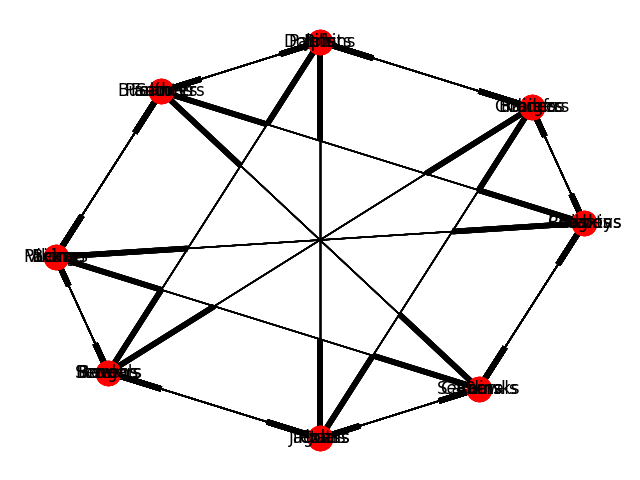

C:\Users\SCOTT\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\SCOTT\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\SCOTT\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\SCOTT\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

In [97]:
#reorder the id_dict so the id_numbers are the keys and the team names are the values
id_dict2 = dict (zip(id_dict.values(),id_dict.keys()))
#create a list of all the edges to pass to the graph function
edges = list(zip(data['id_from'], data['id_to']))
#call the plotting function and plot the edge and nodes
node_plot(edges, id_dict2)


Networkx is good for making an initial graph for quick rough analysis, but for refined, "publish" quality renderings, another program is better suited. If you notice in the function node_plot(): there is a line that outputs a graphml file. I use this file and import it into Gephi to create a better quality graph. Gephi is an open source Social Network analysis and rendering software. Check it out. The image I created is below

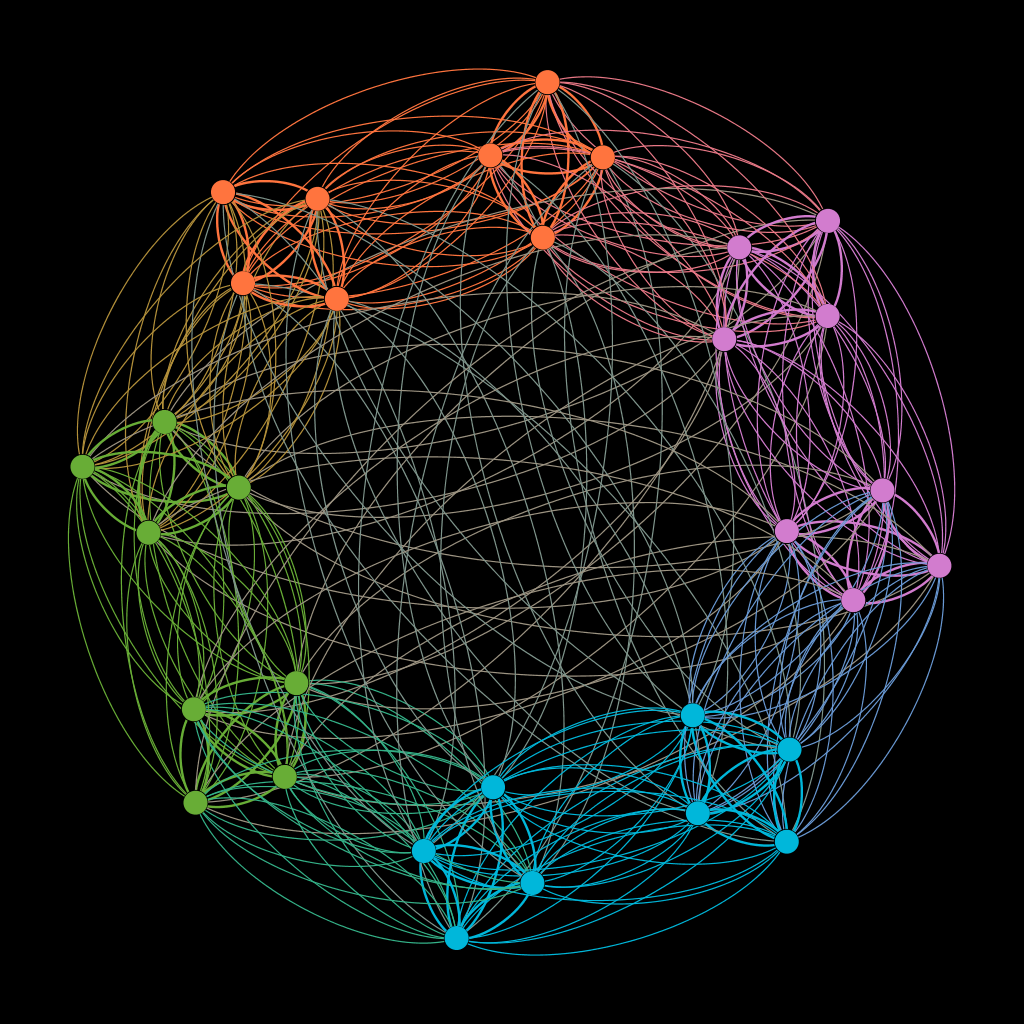

In [99]:
from IPython.display import Image
Image("C:\\Users\\SCOTT\\Desktop\\Data Mining\\Social Network plotting\\NFL Schedule.png")

Analysis:
The NFL is made up of two conferences - the NFC and the AFC. Each conference has 16 teams and those 16 teams are broken up into 4 seperate divisions:

AFC NORTH    NFC NORTH
AFC SOUTH    NFC SOUTH
AFC EAST     NFC EAST
AFC WEST     NFC WEST

Running the Social Network Analysis with Networkx and Gephi, I used the "Forced Atlas 2" algorithm inside of gephi to cluster the teams as seen above. The clusters correctly depict the 4 teams that make up a division. That is why there are 4 nodes in each cluster. The algorithm also places the clusters in the middle of the other clusters a particular cluster plays the most. 

For example:

The divisions are displayed in the image as follows:
Starting at the top of the graph and going clockwise
ORANGE - AFC WEST 
PURPLE - NFC EAST
PURPLE2 - NFC WEST
BLUE - AFC SOUTH
BLUE2 - AFC NORTH
GREEN - NFC NORTH
GREEN2 - NFC SOUTH
ORANGE2 - AFC EAST


So as you can see, the AFC West plays each other twice a year and thats how they got clustered together, and then the bulk of their schedules consist of playing teams from the NFC EAST and the AFC EAST, and thats why AFC WEST cluster was placed between these two clusters. The same logic applies to all other clusters